# MEdical Insurance Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df=pd.read_csv("../Data/SBI_Life_insurance.csv")

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [10]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

# EDA

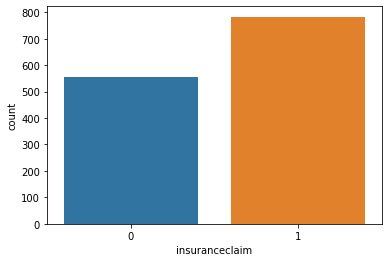

In [22]:
sns.countplot(x='insuranceclaim',data=df)

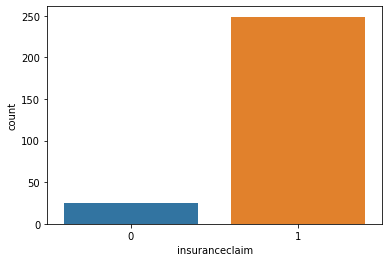

In [23]:
sns.countplot(x='insuranceclaim',data=df[df['smoker']==1])

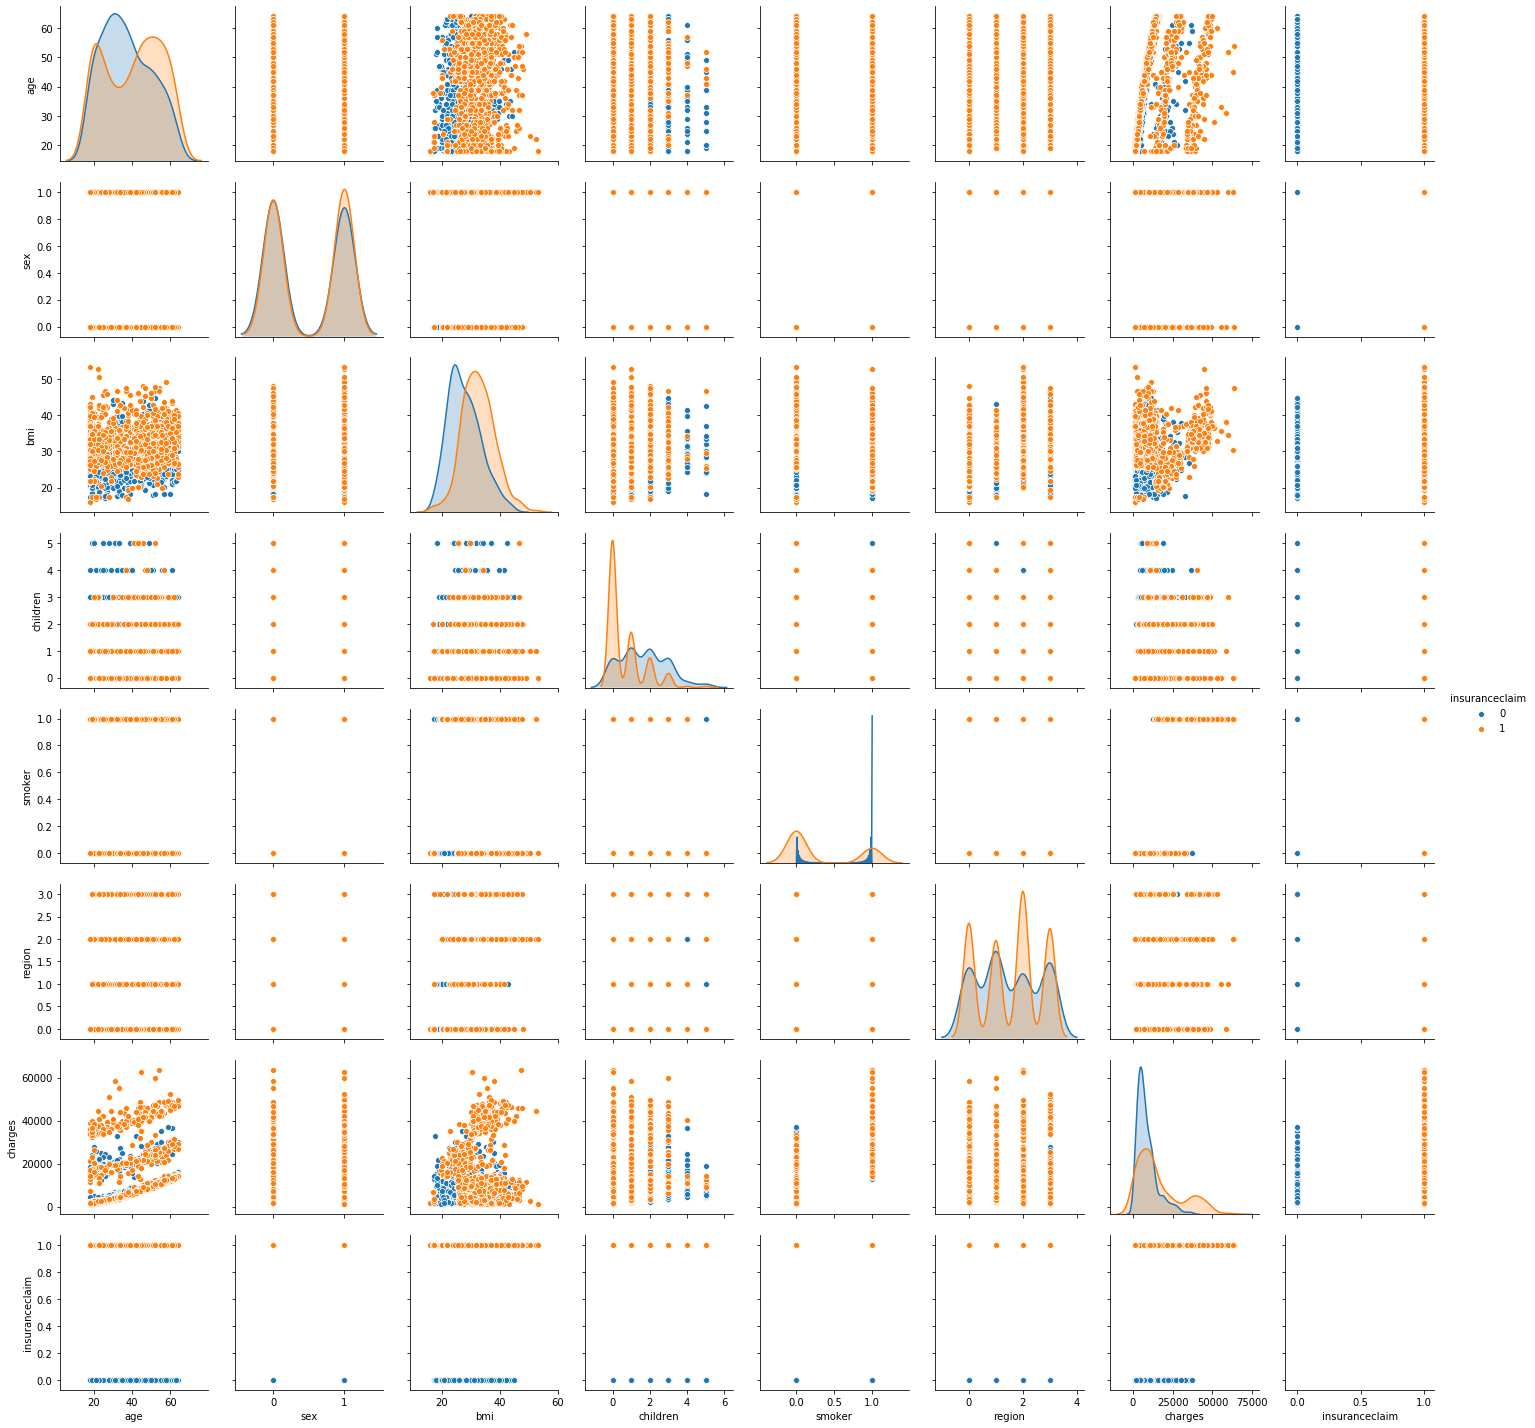

In [26]:
sns.pairplot(data=df,hue='insuranceclaim')

### Let's Do Some Predictive Modeling

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [29]:
X_train, X_test, y_train, y_test=train_test_split(df.drop('insuranceclaim', axis=1), df['insuranceclaim'],test_size=0.25,random_state=0,stratify=df['insuranceclaim'])

In [30]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
predictions = logmodel.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.52      0.63       139
           1       0.73      0.91      0.81       196

    accuracy                           0.75       335
   macro avg       0.76      0.71      0.72       335
weighted avg       0.76      0.75      0.73       335

